In [1]:

# https://www.kaggle.com/andrewfager/mobile-phone-activity-exploratory-analysis
# https://www.kaggle.com/marcodena/mobile-phone-activity/data
# https://www.nature.com/articles/sdata201555
import logging
import pickle
import pandas as pd
from gensim import corpora, models, similarities

# Handy list of the different types of encodings
encoding = ['latin1', 'iso8859-1', 'utf-8'][1]

def load_object(obj_name):
    pickle_path = '../saves/pickle/' + obj_name + '.pickle'
    try:
        object = pd.read_pickle(pickle_path)
    except:
        with open(pickle_path, 'rb') as handle:
            object = pickle.load(handle)
    
    return(object)

def save_dataframes(**kwargs):
    csv_folder = '../saves/csv/'
    for frame_name in kwargs:
        csv_path = csv_folder + frame_name + '.csv'
        kwargs[frame_name].to_csv(csv_path, sep=',', encoding=encoding, index=False)

# Classes, functions, and methods cannot be pickled
def store_objects(**kwargs):
    for obj_name in kwargs:
        if hasattr(kwargs[obj_name], '__call__'):
            raise RuntimeError('Functions cannot be pickled.')
        obj_path = '../saves/pickle/' + str(obj_name)
        pickle_path = obj_path + '.pickle'
        if isinstance(kwargs[obj_name], pd.DataFrame):
            kwargs[obj_name].to_pickle(pickle_path)
        else:
            with open(pickle_path, 'wb') as handle:
                pickle.dump(kwargs[obj_name], handle, pickle.HIGHEST_PROTOCOL)

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
internet_cellId_sequence = load_object('internet_cellId_sequence')
provinces_cellId_sequence = load_object('provinces_cellId_sequence')

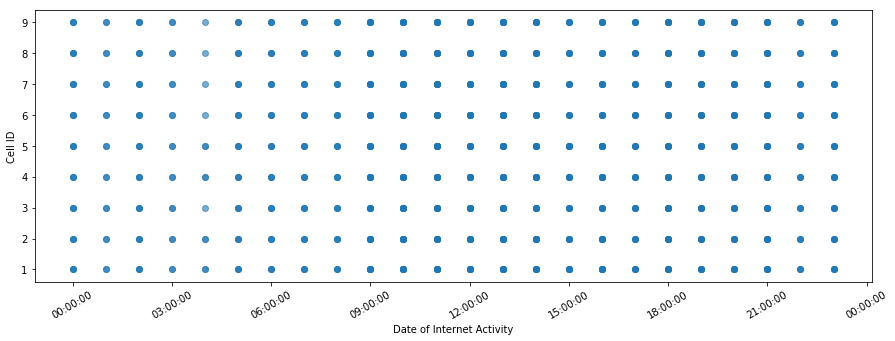

In [2]:

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

internet_df = load_object('internet_df')
internet_df = internet_df.sort_values('datetime')
fig, ax = plt.subplots(figsize=(15, 5))
mask_series = (internet_df['cellId'] < 10) & (internet_df['datetime'] < pd.datetime(2013, 11, 2))
dots = plt.plot_date(internet_df[mask_series]['datetime'], internet_df[mask_series]['cellId'], alpha=0.6)
formatter = DateFormatter('%X')
xaxis = ax.xaxis.set_major_formatter(formatter)
labels = ax.get_xticklabels()
setup = plt.setp(labels, rotation=30, fontsize=10)
xlabel = ax.set_xlabel('Date of Internet Activity')
ylabel = ax.set_ylabel('Cell ID')

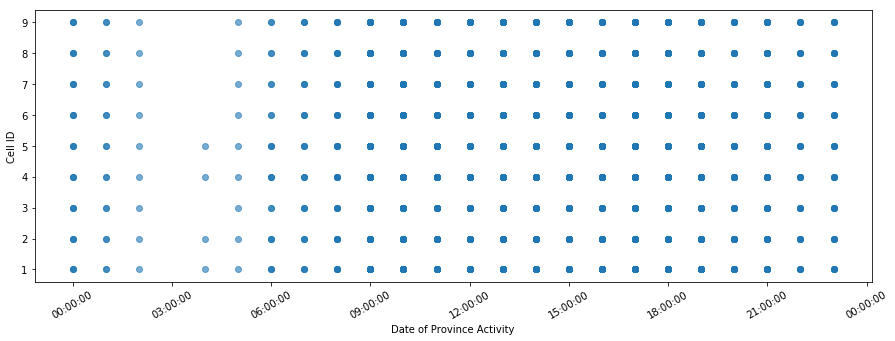

In [3]:

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

provinces_df = load_object('provinces_df')
provinces_df = provinces_df.sort_values('datetime')
fig, ax = plt.subplots(figsize=(15, 5))
mask_series = (provinces_df['cellId'] < 10) & (provinces_df['datetime'] < pd.datetime(2013, 11, 2))
dots = plt.plot_date(provinces_df[mask_series]['datetime'], provinces_df[mask_series]['cellId'], alpha=0.6)
xaxis = ax.xaxis.set_major_formatter(formatter)
labels = ax.get_xticklabels()
setup = plt.setp(labels, rotation=30, fontsize=10)
xlabel = ax.set_xlabel('Date of Province Activity')
ylabel = ax.set_ylabel('Cell ID')

In [4]:

import re

# Make a list of sequences of provinces grouped by cell id
provinces_cellId_sequence = provinces_df.groupby('cellId')['PROVINCIA'].apply(lambda row: row.tolist()).tolist()

# Remove non-word characters and tokenize
non_regex = re.compile(r'[^A-Z]+')
#provinces_cellId_sequence = [[non_regex.sub(r'', province).lower() for province in cellId] for cellId in provinces_cellId_sequence]
store_objects(provinces_cellId_sequence=provinces_cellId_sequence)

In [5]:

from collections import defaultdict

# Remove provinces that appear only once
frequency = defaultdict(int)
for cellID in provinces_cellId_sequence:
    for province in cellID:
        frequency[province] += 1
provinces_cellId_sequence = [[province for province in cellID if frequency[province] > 1] for cellID in provinces_cellId_sequence]
store_objects(provinces_cellId_sequence=provinces_cellId_sequence)

In [6]:

# Store the dictionary, for future reference
dictionary = corpora.Dictionary(provinces_cellId_sequence)
dictionary.save('../saves/dict/provinces_cellId_sequence.dict')

2017-10-03 15:37:19,268 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2017-10-03 15:37:24,074 : INFO : built Dictionary(110 unique tokens: ['MILANO', 'TRENTO', 'PAVIA', 'PALERMO', 'GROSSETO']...) from 10000 documents (total 20047463 corpus positions)
2017-10-03 15:37:24,075 : INFO : saving Dictionary object under ../saves/dict/provinces_cellId_sequence.dict, separately None
2017-10-03 15:37:24,077 : INFO : saved ../saves/dict/provinces_cellId_sequence.dict


In [7]:

print(dictionary)

Dictionary(110 unique tokens: ['MILANO', 'TRENTO', 'PAVIA', 'PALERMO', 'GROSSETO']...)


In [8]:

print(dictionary.token2id)

{'MILANO': 0, 'TRENTO': 1, 'PAVIA': 2, 'PALERMO': 3, 'GROSSETO': 4, 'VARESE': 5, 'PIACENZA': 6, 'MASSA CARRARA': 7, 'ALESSANDRIA': 8, 'POTENZA': 9, 'PARMA': 10, 'NOVARA': 11, 'MONZA E DELLA BRIANZA': 12, 'MODENA': 13, 'LODI': 14, 'LECCO': 15, 'IMPERIA': 16, 'COMO': 17, 'BRESCIA': 18, 'AREZZO': 19, "REGGIO NELL'EMILIA": 20, 'CASERTA': 21, 'FIRENZE': 22, "FORLI'-CESENA": 23, 'GENOVA': 24, 'BOLZANO': 25, 'REGGIO DI CALABRIA': 26, 'ROMA': 27, 'SAVONA': 28, 'UDINE': 29, 'AOSTA': 30, 'PADOVA': 31, 'AVELLINO': 32, 'BARI': 33, 'VERBANO-CUSIO-OSSOLA': 34, 'VENEZIA': 35, 'RAVENNA': 36, 'TRAPANI': 37, 'VITERBO': 38, 'BERGAMO': 39, 'SONDRIO': 40, 'PISA': 41, 'PERUGIA': 42, 'CREMONA': 43, 'TORINO': 44, 'NAPOLI': 45, 'AGRIGENTO': 46, 'VERCELLI': 47, 'VICENZA': 48, 'VERONA': 49, 'SALERNO': 50, 'ASTI': 51, 'OLBIA-TEMPIO': 52, 'ASCOLI PICENO': 53, 'BENEVENTO': 54, 'BOLOGNA': 55, 'LA SPEZIA': 56, 'LUCCA': 57, 'BELLUNO': 58, 'RIMINI': 59, 'MATERA': 60, 'PESARO E URBINO': 61, 'RAGUSA': 62, 'CATANZARO': 63

In [9]:

# Store the Market Matrix format to disk, for later use
corpus = [dictionary.doc2bow(cellID) for cellID in provinces_cellId_sequence]
corpora.MmCorpus.serialize('../saves/mm/provinces_cellId_sequence.mm', corpus)

2017-10-03 15:37:28,787 : INFO : storing corpus in Matrix Market format to ../saves/mm/provinces_cellId_sequence.mm
2017-10-03 15:37:28,793 : INFO : saving sparse matrix to ../saves/mm/provinces_cellId_sequence.mm
2017-10-03 15:37:28,794 : INFO : PROGRESS: saving document #0
2017-10-03 15:37:28,943 : INFO : PROGRESS: saving document #1000
2017-10-03 15:37:29,082 : INFO : PROGRESS: saving document #2000
2017-10-03 15:37:29,221 : INFO : PROGRESS: saving document #3000
2017-10-03 15:37:29,361 : INFO : PROGRESS: saving document #4000
2017-10-03 15:37:29,501 : INFO : PROGRESS: saving document #5000
2017-10-03 15:37:29,640 : INFO : PROGRESS: saving document #6000
2017-10-03 15:37:29,780 : INFO : PROGRESS: saving document #7000
2017-10-03 15:37:29,930 : INFO : PROGRESS: saving document #8000
2017-10-03 15:37:30,078 : INFO : PROGRESS: saving document #9000
2017-10-03 15:37:30,235 : INFO : saved 10000x110 matrix, density=93.227% (1025497/1100000)
2017-10-03 15:37:30,236 : INFO : saving MmCorpus

In [10]:

# Initialize a transformation
tfidf = models.TfidfModel(corpus)
tfidf.save('../saves/tfidf/provinces_cellId_sequence.tfidf')

2017-10-03 15:37:30,242 : INFO : collecting document frequencies
2017-10-03 15:37:30,243 : INFO : PROGRESS: processing document #0
2017-10-03 15:37:30,456 : INFO : calculating IDF weights for 10000 documents and 109 features (1025497 matrix non-zeros)
2017-10-03 15:37:30,457 : INFO : saving TfidfModel object under ../saves/tfidf/provinces_cellId_sequence.tfidf, separately None
2017-10-03 15:37:30,467 : INFO : saved ../saves/tfidf/provinces_cellId_sequence.tfidf


In [11]:

corpus_tfidf = tfidf[corpus]
for cellID in corpus_tfidf[:3]:
    print(cellID)
    print()

[(1, 0.015938536217537307), (3, 0.0104534733871193), (4, 0.09484334203425263), (8, 0.011571523794906117), (9, 0.06705167306402106), (10, 0.001867468767458577), (13, 0.004983407950630949), (16, 0.07514702988164386), (19, 0.11972926545633458), (20, 0.029918764194550605), (21, 0.05236202269527091), (22, 0.0014225486898180688), (23, 0.021891537438241595), (26, 0.13011784739277896), (28, 0.0059293622456682085), (29, 0.1346452500801274), (31, 0.005545896609513169), (32, 0.08171543785933245), (33, 0.011236322159120918), (34, 0.02059992395838835), (35, 0.0061550805002682524), (36, 0.044183105815912074), (37, 0.3052474385562699), (38, 0.04358207412683278), (40, 0.014309382011266593), (41, 0.07080385614451504), (42, 0.012017184576613323), (43, 0.0037353112965462752), (46, 0.0815210862139996), (47, 0.01633847224747521), (48, 0.01553557452160845), (49, 0.0026090499515785087), (50, 0.004505864359492572), (51, 0.053776168880960575), (52, 0.7556539999513944), (53, 0.04624639822907613), (54, 0.0334346

In [12]:

# Define a 2-dimensional LSI space
lsi = models.LsiModel(corpus, id2word=dictionary)
lsi.save('../saves/lsi/provinces_cellId_sequence.lsi')

2017-10-03 15:37:30,479 : INFO : using serial LSI version on this node
2017-10-03 15:37:30,481 : INFO : updating model with new documents
2017-10-03 15:37:30,483 : INFO : preparing a new chunk of documents
2017-10-03 15:37:30,758 : INFO : using 100 extra samples and 2 power iterations
2017-10-03 15:37:30,759 : INFO : 1st phase: constructing (110, 300) action matrix
2017-10-03 15:37:30,981 : INFO : orthonormalizing (110, 300) action matrix
2017-10-03 15:37:31,168 : INFO : 2nd phase: running dense svd on (110, 10000) matrix
2017-10-03 15:37:31,330 : INFO : computing the final decomposition
2017-10-03 15:37:31,331 : INFO : keeping 110 factors (discarding 0.000% of energy spectrum)
2017-10-03 15:37:31,334 : INFO : processed documents up to #10000
2017-10-03 15:37:31,335 : INFO : topic #0(30469.639): 0.468*"MILANO" + 0.281*"MONZA E DELLA BRIANZA" + 0.264*"PAVIA" + 0.216*"NAPOLI" + 0.215*"BERGAMO" + 0.210*"VARESE" + 0.201*"COMO" + 0.190*"MASSA CARRARA" + 0.184*"ROMA" + 0.177*"TORINO"
2017-10

In [13]:

# Create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
corpus_lsi = lsi[corpus_tfidf]

In [14]:

lsi.print_topics(6)

2017-10-03 15:37:31,355 : INFO : topic #0(30469.639): 0.468*"MILANO" + 0.281*"MONZA E DELLA BRIANZA" + 0.264*"PAVIA" + 0.216*"NAPOLI" + 0.215*"BERGAMO" + 0.210*"VARESE" + 0.201*"COMO" + 0.190*"MASSA CARRARA" + 0.184*"ROMA" + 0.177*"TORINO"
2017-10-03 15:37:31,356 : INFO : topic #1(4798.340): -0.633*"MILANO" + -0.256*"PAVIA" + 0.174*"MASSA CARRARA" + 0.157*"PALERMO" + -0.150*"MONZA E DELLA BRIANZA" + 0.148*"BOLZANO" + 0.148*"BARI" + 0.146*"FIRENZE" + 0.142*"SALERNO" + 0.137*"AOSTA"
2017-10-03 15:37:31,357 : INFO : topic #2(3491.513): -0.469*"LODI" + -0.469*"PAVIA" + 0.379*"MONZA E DELLA BRIANZA" + 0.288*"COMO" + 0.235*"VARESE" + 0.217*"LECCO" + -0.194*"PIACENZA" + 0.172*"BERGAMO" + -0.169*"CREMONA" + 0.120*"BRESCIA"
2017-10-03 15:37:31,359 : INFO : topic #3(2667.912): 0.397*"MONZA E DELLA BRIANZA" + 0.365*"LODI" + 0.314*"CREMONA" + -0.304*"TORINO" + -0.303*"NOVARA" + -0.288*"PAVIA" + -0.274*"VARESE" + 0.245*"BERGAMO" + 0.240*"LECCO" + -0.138*"CATANZARO"
2017-10-03 15:37:31,360 : INFO : 

[(0,
  '0.468*"MILANO" + 0.281*"MONZA E DELLA BRIANZA" + 0.264*"PAVIA" + 0.216*"NAPOLI" + 0.215*"BERGAMO" + 0.210*"VARESE" + 0.201*"COMO" + 0.190*"MASSA CARRARA" + 0.184*"ROMA" + 0.177*"TORINO"'),
 (1,
  '-0.633*"MILANO" + -0.256*"PAVIA" + 0.174*"MASSA CARRARA" + 0.157*"PALERMO" + -0.150*"MONZA E DELLA BRIANZA" + 0.148*"BOLZANO" + 0.148*"BARI" + 0.146*"FIRENZE" + 0.142*"SALERNO" + 0.137*"AOSTA"'),
 (2,
  '-0.469*"LODI" + -0.469*"PAVIA" + 0.379*"MONZA E DELLA BRIANZA" + 0.288*"COMO" + 0.235*"VARESE" + 0.217*"LECCO" + -0.194*"PIACENZA" + 0.172*"BERGAMO" + -0.169*"CREMONA" + 0.120*"BRESCIA"'),
 (3,
  '0.397*"MONZA E DELLA BRIANZA" + 0.365*"LODI" + 0.314*"CREMONA" + -0.304*"TORINO" + -0.303*"NOVARA" + -0.288*"PAVIA" + -0.274*"VARESE" + 0.245*"BERGAMO" + 0.240*"LECCO" + -0.138*"CATANZARO"'),
 (4,
  '0.348*"NAPOLI" + 0.327*"CATANZARO" + 0.217*"PALERMO" + -0.204*"FIRENZE" + 0.178*"FOGGIA" + 0.178*"RAGUSA" + -0.177*"BOLOGNA" + -0.174*"GENOVA" + -0.171*"TORINO" + 0.169*"SALERNO"'),
 (5,
  '0.39

In [15]:

# Both bow->tfidf and tfidf->lsi transformations are actually executed here, on the fly
for cellID in corpus_lsi[:3]:
    print(cellID)
    print()

[(0, 0.12377865249282313), (1, 0.20771180899408553), (2, -0.029651290760778347), (3, -0.084031937748946101), (4, 0.040235956960355271), (5, 0.14134744331724042), (6, -0.028976081096612705), (7, -0.085422787436110828), (8, -0.17388620225247087), (9, -0.18970166695247123), (10, 0.31900113498986465), (11, 0.19063712846403649), (12, 0.00066348818565412863), (13, 0.19746885886253507), (14, 0.1547154752870247), (15, -0.17424647298245635), (16, 0.25260827840369759), (17, -0.012328585208511836), (18, -0.00062840270095035182), (19, -0.077049455735480665), (20, 0.020817177628958548), (21, 0.006721688635416832), (22, 0.065805943410006285), (23, -0.17708408783100085), (24, 0.054330294593578431), (25, 0.023341447472741306), (26, 0.079185875688545418), (27, -0.0096868255348805075), (28, 0.052102827128544693), (29, 0.15167692578609962), (30, -0.073086095132071482), (31, 0.019473165769330367), (32, 0.083920305499589676), (33, 0.013200639758834076), (34, 0.096701525293425794), (35, -0.02470546308987791

In [16]:

from gensim.models.word2vec import Word2Vec

model = Word2Vec(provinces_cellId_sequence, workers=4,
                 size=100, min_count=50, window=10, sample=1e-3)
print(model.most_similar('MASSA CARRARA'))

2017-10-03 15:37:31,381 : INFO : collecting all words and their counts
2017-10-03 15:37:31,382 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-10-03 15:37:33,755 : INFO : collected 110 word types from a corpus of 20047463 raw words and 10000 sentences
2017-10-03 15:37:33,756 : INFO : Loading a fresh vocabulary
2017-10-03 15:37:33,757 : INFO : min_count=50 retains 110 unique words (100% of original 110, drops 0)
2017-10-03 15:37:33,757 : INFO : min_count=50 leaves 20047463 word corpus (100% of original 20047463, drops 0)
2017-10-03 15:37:33,759 : INFO : deleting the raw counts dictionary of 110 items
2017-10-03 15:37:33,760 : INFO : sample=0.001 downsamples 85 most-common words
2017-10-03 15:37:33,761 : INFO : downsampling leaves estimated 7826948 word corpus (39.0% of prior 20047463)
2017-10-03 15:37:33,761 : INFO : estimated required memory for 110 words and 100 dimensions: 143000 bytes
2017-10-03 15:37:33,762 : INFO : resetting layer weights
2017-10-03

[('AOSTA', 0.8018984794616699), ('BOLZANO', 0.5197838544845581), ('VERBANO-CUSIO-OSSOLA', 0.23472848534584045), ('LA SPEZIA', 0.23351266980171204), ('BARLETTA-ANDRIA-TRANI', 0.22916561365127563), ('SAVONA', 0.2255568504333496), ('CALTANISSETTA', 0.21815329790115356), ('ALESSANDRIA', 0.19411516189575195), ('CROTONE', 0.1927047073841095), ('FERRARA', 0.1887776255607605)]


In [17]:

from sklearn.manifold import TSNE

# Get the dimensions of the scattertext
vocab = list(model.wv.vocab)
X = model[vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
scattertext_df = pd.concat([pd.DataFrame(X_tsne), pd.Series(vocab)], axis=1)
scattertext_df.columns = ['x', 'y', 'PROVINCIA']
scattertext_df.sample(5)

,x,y,PROVINCIA
64,36.013347,-65.739049,MACERATA
34,-74.433263,-47.038599,VERBANO-CUSIO-OSSOLA
63,-13.792306,-3.123582,CATANZARO
35,-6.332697,-69.160546,VENEZIA
27,99.635314,19.100450,ROMA


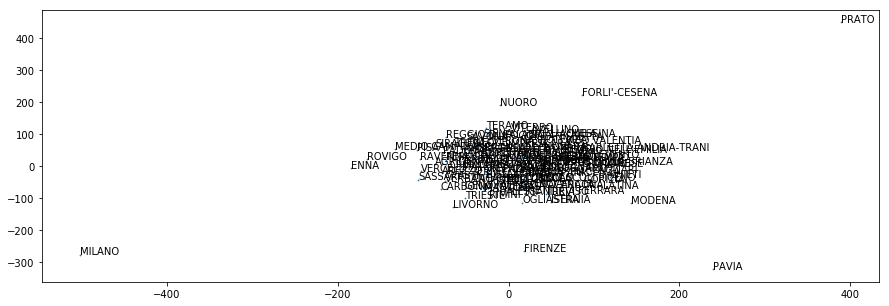

In [18]:

%matplotlib inline
import matplotlib.pyplot as plt

# Plot the scattertext
fig, ax = plt.subplots(figsize=(15, 5))
dots = ax.scatter(scattertext_df['x'], scattertext_df['y'], s=0.5)

# Plot the labels
for i, txt in enumerate(scattertext_df['PROVINCIA']):
    annotation = ax.annotate(txt, (scattertext_df['x'].iloc[i], scattertext_df['y'].iloc[i]))

In [19]:

import math

scattertext_df['distance'] = scattertext_df.apply(lambda row: math.sqrt(row['x']**2 + row['y']**2), axis=1)
scattertext_df.sort_values('distance', ascending=False).head(5)

,x,y,PROVINCIA,distance
88,389.090520,450.343222,PRATO,595.147419
0,-502.253159,-277.060746,MILANO,573.603428
2,239.257018,-323.191887,PAVIA,402.115551
22,18.531840,-266.309845,FIRENZE,266.953859
23,85.555961,222.397280,FORLI'-CESENA,238.286325


In [20]:

# Merge the scattertext dataframe with the shapefile
Italian_provinces_gdf = load_object('Italian_provinces_gdf')
#Italian_provinces_gdf = pd.merge(Italian_provinces_gdf, scattertext_df, on=['PROVINCIA'], how='inner')
column_list = ['PROVINCIA', 'SIGLA', 'SHAPE_AREA', 'geometry', 'distance']
#Italian_provinces_gdf[column_list].sample(4).T

2017-10-03 15:37:59,730 : WARNING : PROJ data files not located, PROJ_LIB not set


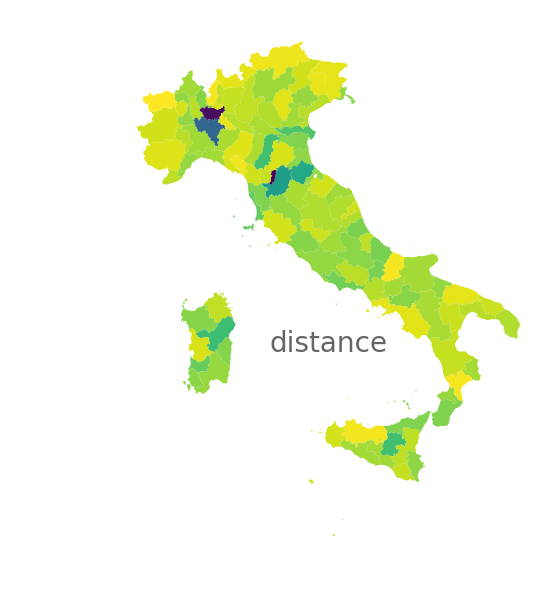

In [21]:

# Make a choropleth of the distance
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import geopandas as gpd

subplot = pd.merge(Italian_provinces_gdf, scattertext_df, on=['PROVINCIA'],
                   how='inner').plot('distance', cmap='viridis_r', figsize=(15, 5))
subplot.set_axis_off()
note = subplot.text(0.5, 0.4, 'distance', ha='center', va='center', transform=subplot.transAxes,
                    fontsize=14, fontweight='normal', alpha=.6)

In [22]:

# Does the distance choropleth look like a population density choropleth?
# https://en.wikipedia.org/wiki/Provinces_of_Italy
file_path = '../data/html/province_density.html'
province_density_df = pd.read_html(file_path)[0]
province_density_df.columns = ['ISTAT_code', 'PROVINCIA', 'ISO_code', 'Administrative_Region', 'Macro_Region',
                       'Population', 'Area', 'Density', 'Comuni', 'President']
province_density_df['PROVINCIA'] = province_density_df['PROVINCIA'].map(lambda x: x.split('[')[0].strip().upper())
province_density_df.sample(5).T

,33,15,109,86,45
ISTAT_code,43,21,63,75,69
PROVINCIA,MACERATA,SOUTH TYROL,NAPLES (METROPOLITAN CITY),LECCE,CHIETI
ISO_code,MC,BZ,NaN,LE,CH
Administrative_Region,Marche,Trentino-South Tyrol,Campania,Apulia,Abruzzo
Macro_Region,Centre,North-East,South,South,South
Population,325362,507657,3080873,815597,397123
Area,2774,7400,1171,2759,2588
Density,117,69,2631,296,153
Comuni,50,116,92,87,104
President,Antonio Pettinari,Arno Kompatscher,Luigi De Magistris,Antonio Maria Gabellone,Mario Pupillo


In [23]:

# Provinces in either the geojson file or the province density dataframe but not both
s = set(Italian_provinces_gdf['PROVINCIA'])
t = set(province_density_df['PROVINCIA'])
s ^ t

{'BARI',
 'BARI (METROPOLITAN CITY)',
 'BOLOGNA',
 'BOLOGNA (METROPOLITAN CITY)',
 'BOLZANO',
 'CAGLIARI',
 'CAGLIARI (METROPOLITAN CITY)',
 'CALTANISSETTA',
 'CALTANISSETTA (FREE COMMUNAL CONSORTIUM)',
 'CATANIA',
 'CATANIA (METROPOLITAN CITY)',
 'ENNA',
 'ENNA (FREE COMMUNAL CONSORTIUM)',
 'FIRENZE',
 'FLORENCE (METROPOLITAN CITY)',
 "FORLI'-CESENA",
 'FORLÃ¬-CESENA',
 'GENOA (METROPOLITAN CITY)',
 'GENOVA',
 'MANTOVA',
 'MANTUA',
 'MASSA AND CARRARA',
 'MASSA CARRARA',
 'MESSINA',
 'MESSINA (METROPOLITAN CITY)',
 'MILAN (METROPOLITAN CITY)',
 'MILANO',
 'MONZA AND BRIANZA',
 'MONZA E DELLA BRIANZA',
 'NAPLES (METROPOLITAN CITY)',
 'NAPOLI',
 'PADOVA',
 'PADUA',
 'PALERMO',
 'PALERMO (METROPOLITAN CITY)',
 'PESARO AND URBINO',
 'PESARO E URBINO',
 'RAGUSA',
 'RAGUSA (FREE COMMUNAL CONSORTIUM)',
 'REGGIO CALABRIA',
 'REGGIO DI CALABRIA',
 'REGGIO EMILIA',
 "REGGIO NELL'EMILIA",
 'ROMA',
 'ROME (METROPOLITAN CITY)',
 'SIRACUSA',
 'SOUTH TYROL',
 'SYRACUSE (FREE COMMUNAL CONSORTIUM)',
 

In [24]:

# Provinces in the province density dataframe but not in the geojson file
t - s

{'BARI (METROPOLITAN CITY)',
 'BOLOGNA (METROPOLITAN CITY)',
 'CAGLIARI (METROPOLITAN CITY)',
 'CALTANISSETTA (FREE COMMUNAL CONSORTIUM)',
 'CATANIA (METROPOLITAN CITY)',
 'ENNA (FREE COMMUNAL CONSORTIUM)',
 'FLORENCE (METROPOLITAN CITY)',
 'FORLÃ¬-CESENA',
 'GENOA (METROPOLITAN CITY)',
 'MANTUA',
 'MASSA AND CARRARA',
 'MESSINA (METROPOLITAN CITY)',
 'MILAN (METROPOLITAN CITY)',
 'MONZA AND BRIANZA',
 'NAPLES (METROPOLITAN CITY)',
 'PADUA',
 'PALERMO (METROPOLITAN CITY)',
 'PESARO AND URBINO',
 'RAGUSA (FREE COMMUNAL CONSORTIUM)',
 'REGGIO CALABRIA',
 'REGGIO EMILIA',
 'ROME (METROPOLITAN CITY)',
 'SOUTH TYROL',
 'SYRACUSE (FREE COMMUNAL CONSORTIUM)',
 'TRAPANI (FREE COMMUNAL CONSORTIUM)',
 'TRENTINO',
 'TURIN (METROPOLITAN CITY)',
 'VENICE (METROPOLITAN CITY)'}

In [25]:

# Provinces in the geojson file but not in the province density dataframe
s - t

{'BARI',
 'BOLOGNA',
 'BOLZANO',
 'CAGLIARI',
 'CALTANISSETTA',
 'CATANIA',
 'ENNA',
 'FIRENZE',
 "FORLI'-CESENA",
 'GENOVA',
 'MANTOVA',
 'MASSA CARRARA',
 'MESSINA',
 'MILANO',
 'MONZA E DELLA BRIANZA',
 'NAPOLI',
 'PADOVA',
 'PALERMO',
 'PESARO E URBINO',
 'RAGUSA',
 'REGGIO DI CALABRIA',
 "REGGIO NELL'EMILIA",
 'ROMA',
 'SIRACUSA',
 'TORINO',
 'TRAPANI',
 'TRENTO',
 'VENEZIA'}

In [26]:

# Fix the provinces in the province density dataframe
mask_series = (province_density_df['PROVINCIA'] == 'BARI (METROPOLITAN CITY)')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'BARI'
mask_series = (province_density_df['PROVINCIA'] == 'BOLOGNA (METROPOLITAN CITY)')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'BOLOGNA'
mask_series = (province_density_df['PROVINCIA'] == 'CAGLIARI (METROPOLITAN CITY)')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'CAGLIARI'
mask_series = (province_density_df['PROVINCIA'] == 'CALTANISSETTA (FREE COMMUNAL CONSORTIUM)')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'CALTANISSETTA'
mask_series = (province_density_df['PROVINCIA'] == 'CATANIA (METROPOLITAN CITY)')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'CATANIA'
mask_series = (province_density_df['PROVINCIA'] == 'ENNA (FREE COMMUNAL CONSORTIUM)')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'ENNA'
mask_series = (province_density_df['PROVINCIA'] == 'FLORENCE (METROPOLITAN CITY)')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'FIRENZE'
mask_series = (province_density_df['PROVINCIA'] == 'FORLÃ¬-CESENA')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = "FORLI'-CESENA"
mask_series = (province_density_df['PROVINCIA'] == 'GENOA (METROPOLITAN CITY)')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'GENOVA'
mask_series = (province_density_df['PROVINCIA'] == 'MANTUA')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'MANTOVA'
mask_series = (province_density_df['PROVINCIA'] == 'MASSA AND CARRARA')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'MASSA CARRARA'
mask_series = (province_density_df['PROVINCIA'] == 'MESSINA (METROPOLITAN CITY)')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'MESSINA'
mask_series = (province_density_df['PROVINCIA'] == 'MILAN (METROPOLITAN CITY)')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'MILANO'
mask_series = (province_density_df['PROVINCIA'] == 'MONZA AND BRIANZA')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'MONZA E DELLA BRIANZA'
mask_series = (province_density_df['PROVINCIA'] == 'NAPLES (METROPOLITAN CITY)')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'NAPOLI'
mask_series = (province_density_df['PROVINCIA'] == 'PADUA')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'PADOVA'
mask_series = (province_density_df['PROVINCIA'] == 'PALERMO (METROPOLITAN CITY)')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'PALERMO'
mask_series = (province_density_df['PROVINCIA'] == 'PESARO AND URBINO')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'PESARO E URBINO'
mask_series = (province_density_df['PROVINCIA'] == 'RAGUSA (FREE COMMUNAL CONSORTIUM)')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'RAGUSA'
mask_series = (province_density_df['PROVINCIA'] == 'REGGIO CALABRIA')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'REGGIO DI CALABRIA'
mask_series = (province_density_df['PROVINCIA'] == 'REGGIO EMILIA')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = "REGGIO NELL'EMILIA"
mask_series = (province_density_df['PROVINCIA'] == 'ROME (METROPOLITAN CITY)')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'ROMA'
mask_series = (province_density_df['PROVINCIA'] == 'SOUTH TYROL')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'BOLZANO'
mask_series = (province_density_df['PROVINCIA'] == 'SYRACUSE (FREE COMMUNAL CONSORTIUM)')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'SIRACUSA'
mask_series = (province_density_df['PROVINCIA'] == 'TRAPANI (FREE COMMUNAL CONSORTIUM)')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'TRAPANI'
mask_series = (province_density_df['PROVINCIA'] == 'TRENTINO')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'TRENTO'
mask_series = (province_density_df['PROVINCIA'] == 'TURIN (METROPOLITAN CITY)')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'TORINO'
mask_series = (province_density_df['PROVINCIA'] == 'VENICE (METROPOLITAN CITY)')
province_density_df.loc[province_density_df[mask_series].index, 'PROVINCIA'] = 'VENEZIA'
t = set(province_density_df['PROVINCIA'])
s ^ t

set()

In [28]:

# Merge the province density dataframe with the shapefile
Italian_provinces_gdf = load_object('Italian_provinces_gdf')
#Italian_provinces_gdf = pd.merge(Italian_provinces_gdf, province_density_df, on=['PROVINCIA'], how='inner')
column_list = ['PROVINCIA', 'SIGLA', 'SHAPE_AREA', 'geometry', 'Density']
Italian_provinces_gdf[column_list].sample(4).T

,27,31,15,65
PROVINCIA,VENEZIA,MODENA,SONDRIO,L'AQUILA
SIGLA,VE,MO,SO,AQ
SHAPE_AREA,2.47358e+09,2.688e+09,3.19501e+09,5.04717e+09
geometry,(POLYGON ((795154.7136689302 5081710.566145039...,(POLYGON ((665195.1017021139 4980436.477428061...,(POLYGON ((595652.3579044023 5163515.658006833...,(POLYGON ((861506.1231770946 4722805.875260312...
Density,351,261,57,62


In [ ]:

# Make a choropleth of the population density
subplot = Italian_provinces_gdf.plot('Density', cmap='viridis_r', figsize=(15, 5))
subplot.set_axis_off()
note = subplot.text(0.5, 0.4, 'Density', ha='center', va='center', transform=subplot.transAxes,
                    fontsize=14, fontweight='normal', alpha=.6)

In [ ]:

store_objects(Italian_provinces_gdf=Italian_provinces_gdf)

In [ ]:

# Plot the wikipedia area against the geodata area
fig, ax = plt.subplots(figsize=(15, 5))
dots = ax.scatter(Italian_provinces_gdf['SHAPE_AREA'], Italian_provinces_gdf['Area'])

# Plot the labels
for i, txt in enumerate(Italian_provinces_gdf['PROVINCIA']):
    annotation = ax.annotate(txt, (Italian_provinces_gdf['SHAPE_AREA'].iloc[i],
                                   Italian_provinces_gdf['Area'].iloc[i]))

In [ ]:

column_list = ['PROVINCIA', 'SIGLA', 'SHAPE_AREA', 'Area', 'geometry', 'ISTAT_code', 'ISO_code',
               'Administrative_Region', 'Macro_Region', 'Population', 'Density', 'Comuni', 'President']
mask_series = (Italian_provinces_gdf['PROVINCIA'] == 'CAGLIARI')
Italian_provinces_gdf[mask_series][column_list].T

In [ ]:

# Make a choropleth of the shape area
subplot = Italian_provinces_gdf.plot('SHAPE_AREA', cmap='viridis_r', figsize=(15, 5))
subplot.set_axis_off()
note = subplot.text(0.5, 0.4, 'SHAPE_AREA', ha='center', va='center', transform=subplot.transAxes,
                    fontsize=14, fontweight='normal', alpha=.6)

In [ ]:

# Make a choropleth of the area
subplot = Italian_provinces_gdf.plot('Area', cmap='viridis_r', figsize=(15, 5))
subplot.set_axis_off()
note = subplot.text(0.5, 0.4, 'Area', ha='center', va='center', transform=subplot.transAxes,
                    fontsize=14, fontweight='normal', alpha=.6)

In [ ]:

# Make a choropleth of Cagliari
subplot = Italian_provinces_gdf[mask_series].plot('Area', cmap='viridis_r', figsize=(15, 5))
subplot.set_axis_off()
note = subplot.text(0.5, 0.4, 'CAGLIARI', ha='center', va='center', transform=subplot.transAxes,
                    fontsize=14, fontweight='normal', alpha=.6)

In [ ]:

# Confused the metro area for the province
mask_series = (Italian_provinces_gdf['PROVINCIA'] == 'CAGLIARI')
Italian_provinces_gdf.loc[Italian_provinces_gdf[mask_series].index, 'Area'] = 4570
Italian_provinces_gdf.loc[Italian_provinces_gdf[mask_series].index, 'Population'] = 551053
Italian_provinces_gdf.loc[Italian_provinces_gdf[mask_series].index, 'Density'] = 120
store_objects(Italian_provinces_gdf=Italian_provinces_gdf)

In [ ]:

# Plot the wikipedia area against the geodata area again
fig, ax = plt.subplots(figsize=(15, 5))
dots = ax.scatter(Italian_provinces_gdf['SHAPE_AREA'], Italian_provinces_gdf['Area'])

# Plot the labels
for i, txt in enumerate(Italian_provinces_gdf['PROVINCIA']):
    annotation = ax.annotate(txt, (Italian_provinces_gdf['SHAPE_AREA'].iloc[i],
                                   Italian_provinces_gdf['Area'].iloc[i]))

In [ ]:

Italian_provinces_gdf.sort_values('PROVINCIA')['PROVINCIA']

In [ ]:

# Make a choropleth of Bolzano
column_list = ['PROVINCIA', 'SIGLA', 'SHAPE_AREA', 'Area', 'geometry', 'ISTAT_code', 'ISO_code',
               'Administrative_Region', 'Macro_Region', 'Population', 'Density', 'Comuni', 'President']
mask_series = (Italian_provinces_gdf['PROVINCIA'] == 'BOLZANO') | (Italian_provinces_gdf['PROVINCIA'] == 'SOUTH TYROL')
Italian_provinces_gdf[mask_series][column_list].T
subplot = Italian_provinces_gdf[mask_series].plot('Area', cmap='viridis_r', figsize=(15, 5))
subplot.set_axis_off()
note = subplot.text(0.5, 0.4, 'BOLZANO/\nSOUTH TYROL', ha='center', va='center', transform=subplot.transAxes,
                    fontsize=14, fontweight='normal', alpha=.6)

In [29]:

# Get similarities between the each index document and all index documents
index = similarities.Similarity('../shards/tst', corpus, num_features=9999)
index[corpus]

2017-10-03 15:51:27,038 : INFO : starting similarity index under ../shards/tst
2017-10-03 15:51:29,909 : INFO : PROGRESS: fresh_shard size=10000
2017-10-03 15:51:29,909 : INFO : creating sparse index
2017-10-03 15:51:29,910 : INFO : creating sparse matrix from corpus
2017-10-03 15:51:29,912 : INFO : PROGRESS: at document #0/10000
2017-10-03 15:51:31,882 : INFO : created <10000x9999 sparse matrix of type '<class 'numpy.float32'>'
	with 1025497 stored elements in Compressed Sparse Row format>
2017-10-03 15:51:31,883 : INFO : creating sparse shard #0
2017-10-03 15:51:31,884 : INFO : saving index shard to ../shards/tst.0
2017-10-03 15:51:31,884 : INFO : saving SparseMatrixSimilarity object under ../shards/tst.0, separately None
2017-10-03 15:51:31,939 : INFO : saved ../shards/tst.0
2017-10-03 15:51:31,940 : INFO : loading SparseMatrixSimilarity object from ../shards/tst.0
2017-10-03 15:51:31,981 : INFO : loaded ../shards/tst.0


array([[ 0.99999964,  0.99828327,  0.99304187, ...,  0.75990605,
         0.79253781,  0.77597976],
       [ 0.99828327,  1.00000012,  0.9940967 , ...,  0.76215249,
         0.79559863,  0.7752474 ],
       [ 0.99304187,  0.9940967 ,  0.99999976, ...,  0.74064642,
         0.77014023,  0.74814659],
       ..., 
       [ 0.75990605,  0.76215249,  0.74064642, ...,  0.99999982,
         0.98662668,  0.97702074],
       [ 0.79253781,  0.79559863,  0.77014023, ...,  0.98662668,
         1.00000048,  0.98607367],
       [ 0.77597976,  0.7752474 ,  0.74814659, ...,  0.97702074,
         0.98607367,  0.99999976]], dtype=float32)

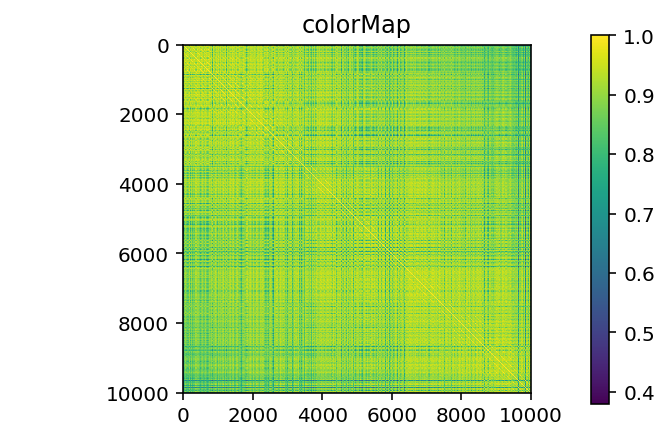

In [30]:

import numpy as np
import matplotlib.pyplot as plt

H = index[corpus]

fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
text = ax.set_title('colorMap')
show = plt.imshow(H)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
colorbar = plt.colorbar(orientation='vertical')

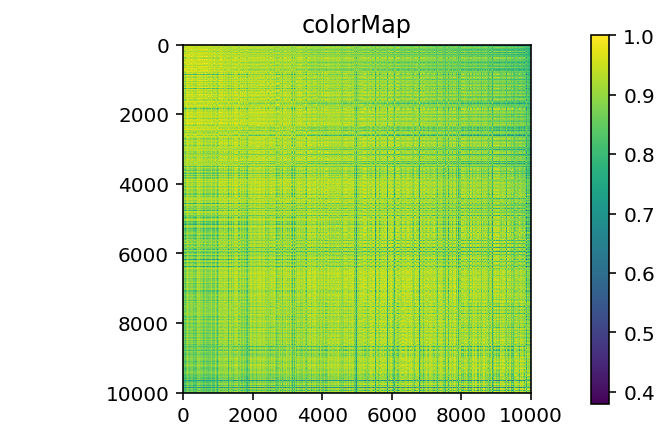

In [31]:

column_list = provinces_df['cellId'].unique()
correlation_df = pd.DataFrame(H, columns=column_list, index=column_list)
column_list = [cellId for cellId, correlation in sorted([(cellId, correlation) for cellId, correlation in zip(column_list, H[0])],
                                                        key=lambda x: x[1], reverse=True)]

fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
text = ax.set_title('colorMap')
show = plt.imshow(correlation_df.as_matrix(columns=column_list))
ax.set_aspect('equal')

axes = cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
colorbar = plt.colorbar(orientation='vertical')

In [32]:

correlation_df.sample(5).T.sample(5).T

,1505,3679,652,3850,819
9843,0.905196,0.918916,0.915438,0.870420,0.920257
4804,0.912706,0.920275,0.938440,0.908719,0.903678
2242,0.907718,0.888849,0.889294,0.818863,0.886452
6945,0.900206,0.851348,0.900124,0.801091,0.854962
9424,0.905322,0.817227,0.926796,0.889425,0.860754


In [42]:

save_dataframes(correlation_df=correlation_df)
store_objects(correlation_df=correlation_df)